In [2]:
import pandas as pd
from pandas import DataFrame
from pandas import concat
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import numpy as np
import random
from sklearn.cross_validation import cross_val_score # K折交叉验证模块
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn import svm
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.multiclass import OutputCodeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.pipeline import Pipeline as ImPineline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import IsolationForest
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.grid_search import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.signal import lfilter
import time
from ew_utils import *
import pywt
%matplotlib inline

In [3]:
def intervalEWFeature(d, start=0, end=-1, filterThrehold=1):
    cp = d.copy()
    cp[abs(cp)<filterThrehold] = 0
    rd = cp.iloc[:, start:end]
    ew_absorb = rd[rd<0].sum(axis=1)
    ew_fs = rd[rd>0].sum(axis=1)
    return pd.concat([ew_absorb, ew_fs], axis=1)

def EWByRangeList(d, rangeList):
    ewfAll = pd.DataFrame()
    for r in rangeList:
        start, end = r
        ewf = intervalEWFeature(d, start, end)
        newNames = ['ew_' + str(start) + '_' + str(end) + '_' + str(v) for v in ewf.columns.values]
        ewf.columns = newNames
        ewfAll = pd.concat([ewfAll,ewf], axis=1)
    return ewfAll

In [4]:
def plotSpec(tp, start=0, end=-1, filterLow=False, threhold=1, showEW = False):
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    flen = 8
    cp = tp.copy()
    if filterLow:
        cp[abs(cp)<threhold]=0
    if showEW:
        display(intervalEWFeature(cp, start, end))
    if filterLow:
        cp[abs(cp)<threhold] = 0
    for i in range(1,flen+1):
        plt.subplot(flen*100+10+i)
        plt.plot(cp.iloc[random.randint(0,tp.shape[0]-1),start:end] )
# plt.plot(star.iloc[random.randint(0,star.shape[0]),:] )
# plt.plot(star.iloc[random.randint(0,star.shape[0]),:] )

In [5]:
def readByFileIndex(fileIndex):
    fileIndex = 12
    fileName = 'train_feature_all_'
    specSet = pd.read_csv(fileName + str(fileIndex) +'.csv', header=None)
    specSet.head()
    renameCol = {0:'id'}
    renameCol[specSet.shape[1]-1] = 'label'
    specSet.rename(columns=renameCol, inplace=True)
    return(specSet)

In [6]:
specSet = pd.DataFrame()
for i in range(1,3):
    specSet = pd.concat([specSet, readByFileIndex(i)])
specSet.head()
# specSet.iloc[:,1:-1] = scale(specSet.iloc[:,1:-1], axis=1)

,id,1,2,3,4,5,6,7,8,9,...,2592,2593,2594,2595,2596,2597,2598,2599,2600,label
0,826484,518.208005,586.654777,621.144414,644.129089,704.870853,690.488824,677.871699,670.651216,680.267368,...,238.975036,242.185376,239.985926,227.879340,210.909571,205.435909,208.161723,222.732554,240.093265,star
1,1313525,220.934456,313.073021,384.987697,356.785274,386.874041,309.302529,282.988298,189.350678,157.384245,...,403.202077,403.660681,395.779441,386.200415,368.421435,370.905995,380.919942,384.304174,382.298233,star
2,713713,179.038128,239.863365,287.559219,280.881822,247.082978,265.060174,282.777014,203.615270,156.769635,...,182.675845,188.041283,186.390783,182.405247,176.669945,177.926743,185.220005,190.829244,191.178803,star
3,1129637,-5.390428,87.854853,45.714471,70.501442,127.883038,-62.318840,144.044142,11.513947,149.797327,...,65.459253,65.336603,64.818929,66.783039,60.027480,59.405510,66.978640,68.662624,65.384539,star
4,786793,3814.422843,2249.374403,3899.687556,3102.276713,2560.325346,2717.475790,3811.087400,2830.009386,3517.938512,...,1165.601500,1161.901461,1172.108495,1177.504545,1167.765041,1149.920248,1148.756673,1143.961533,1140.804317,unknown


In [6]:
specSet.iloc[:,1:-1] = scale(specSet.iloc[:,1:-1], axis=1)

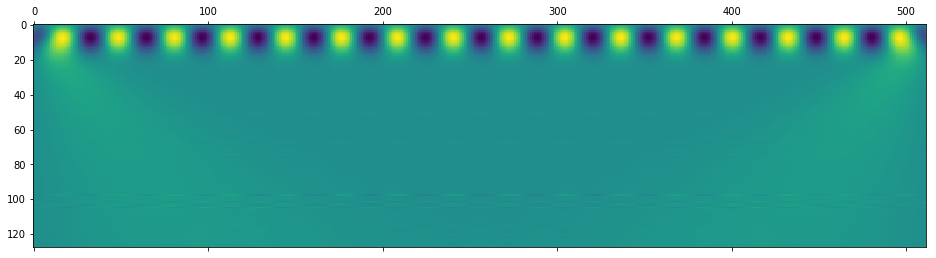

In [8]:
x = np.arange(512)
y = np.sin(2*np.pi*x/32)
coef, freqs=pywt.cwt(y,np.arange(1,129),'gaus1')
plt.matshow(coef)
plt.show() 

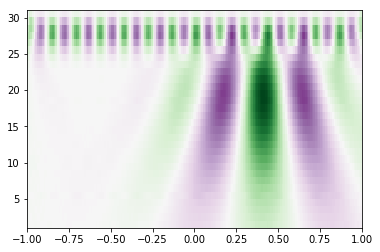

In [9]:
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + np.real(np.exp(-7*(t-0.4)**2)*np.exp(1j*2*np.pi*2*(t-0.4)))
widths = np.arange(1, 31)
cwtmatr, freqs = pywt.cwt(sig, widths, 'mexh')
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show() 

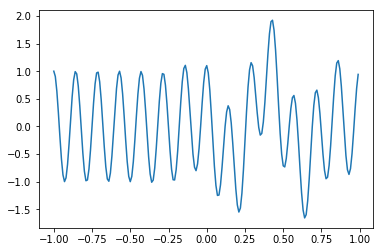

In [10]:
plt.plot(t, sig)

In [11]:
n = 5  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
filterSet = specSet
# filterSet.iloc[:,1:-1] = lfilter(b, a, filterSet.iloc[:,1:-1], axis=1)

In [12]:
specSet.label.value_counts()

star       18348
unknown     1406
galaxy       192
qso           54
Name: label, dtype: int64

In [13]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
star = pd.DataFrame(filterSet[specSet.label=='star'].iloc[:, 1:-1])
unknown = pd.DataFrame(filterSet[specSet.label=='unknown'].iloc[:, 1:-1])
galaxy = pd.DataFrame(filterSet[specSet.label=='galaxy'].iloc[:, 1:-1])
qso = pd.DataFrame(filterSet[specSet.label=='qso'].iloc[:, 1:-1])


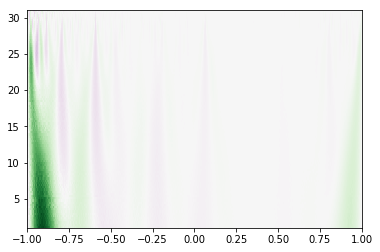

In [94]:
widths = np.arange(1,100)
cwtmatr, freqs = pywt.cwt(star.iloc[random.randint(0,100),:], widths, 'mexh')
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show() 

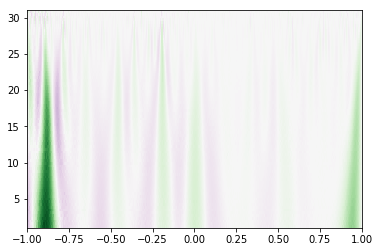

In [108]:

widths = np.arange(1,80)
cwtmatr, freqs = pywt.cwt(qso.iloc[random.randint(0,qso.shape[0]-1),:], widths, 'mexh')
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show() 

In [136]:
def wplot(kd, start=1, end=500):
    widths = np.arange(start,end)
    cwtmatr, freqs = pywt.cwt(kd.iloc[random.randint(0,kd.shape[0]-1),:], widths, 'mexh')
    plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
    plt.show() 

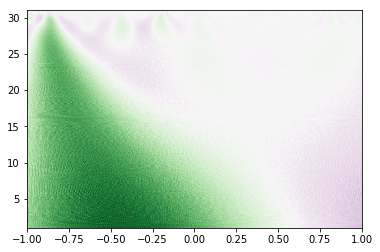

In [137]:
wplot(qso,end=1000)

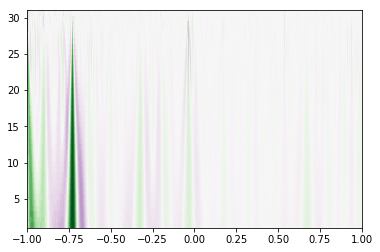

In [220]:
wplot(qso,end=40)

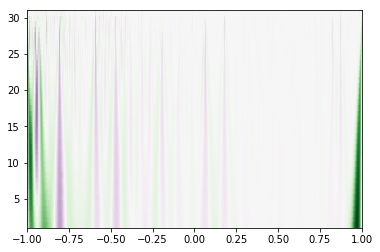

In [247]:
wplot(star,end=40)

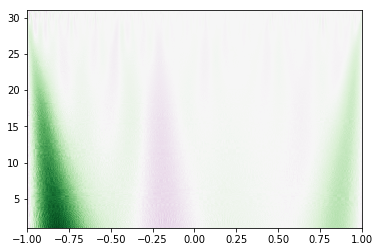

In [184]:
wplot(star,end=200)

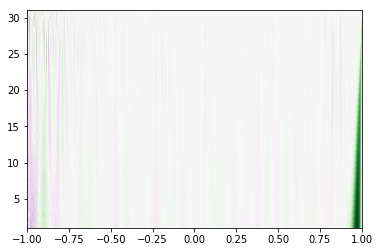

In [258]:
wplot(unknown,end=40)

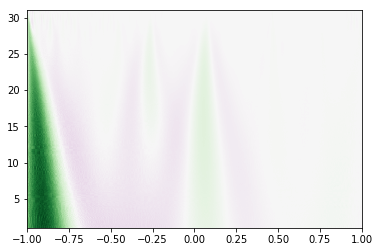

In [260]:
wplot(unknown,end=200)

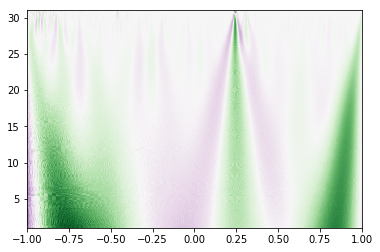

In [175]:
wplot(galaxy,end=200)

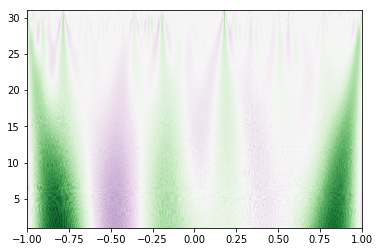

In [174]:
wplot(galaxy,end=200)

In [ ]:
widths = np.arange(1,100)
cwtmatr, freqs = pywt.cwt(unknown.iloc[random.randint(0,100),:], widths, 'mexh')
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

In [13]:
pca = PCA(n_components=2)
rs = pd.DataFrame(pca.fit_transform(star.transpose())).transpose()
rs.head()

,0,1,2,3,4,5,6,7,8,9,...,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599
0,69.387442,7.245804,-34.892835,-42.207367,-29.327364,-54.234911,-57.111754,-15.072144,18.658014,1.926613,...,157.370821,158.808794,159.372561,159.713217,164.848566,170.492869,172.419643,170.154636,164.013565,159.089564
1,267.280749,242.857925,224.195321,227.077808,239.305780,235.038621,232.415243,262.885912,289.447413,286.568297,...,34.239587,35.643148,35.419591,36.076087,46.889692,58.977405,62.724903,57.345473,44.906028,34.555568


In [15]:
def pcaTrans(data):
    pca = PCA(n_components=2)
    rs = pd.DataFrame(pca.fit_transform(data.transpose())).transpose()
    return rs

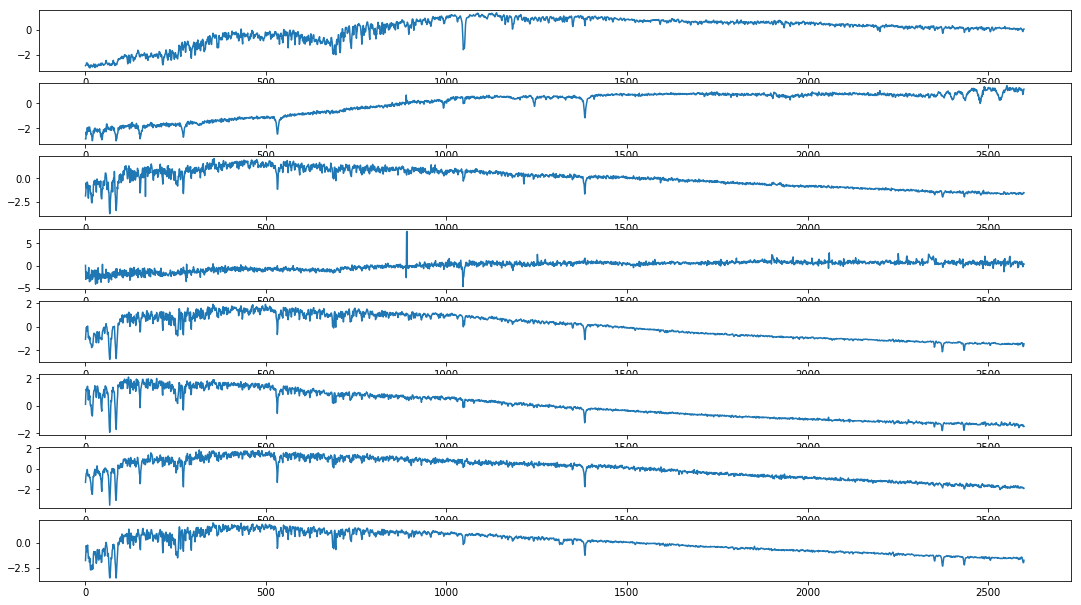

In [24]:
plotSpec(star)

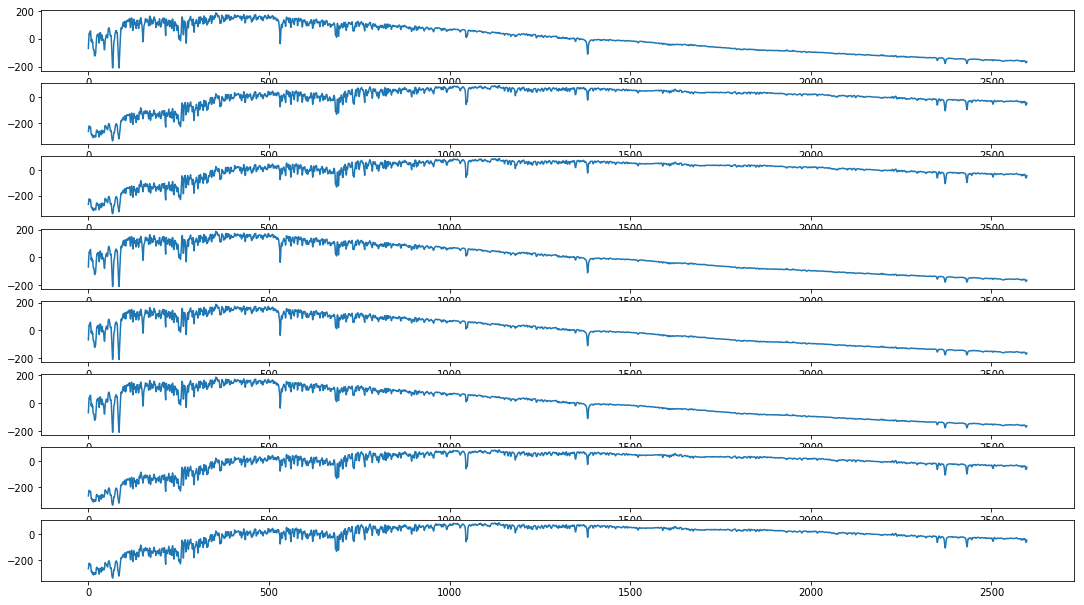

In [22]:
plotSpec(-pcaTrans(star))

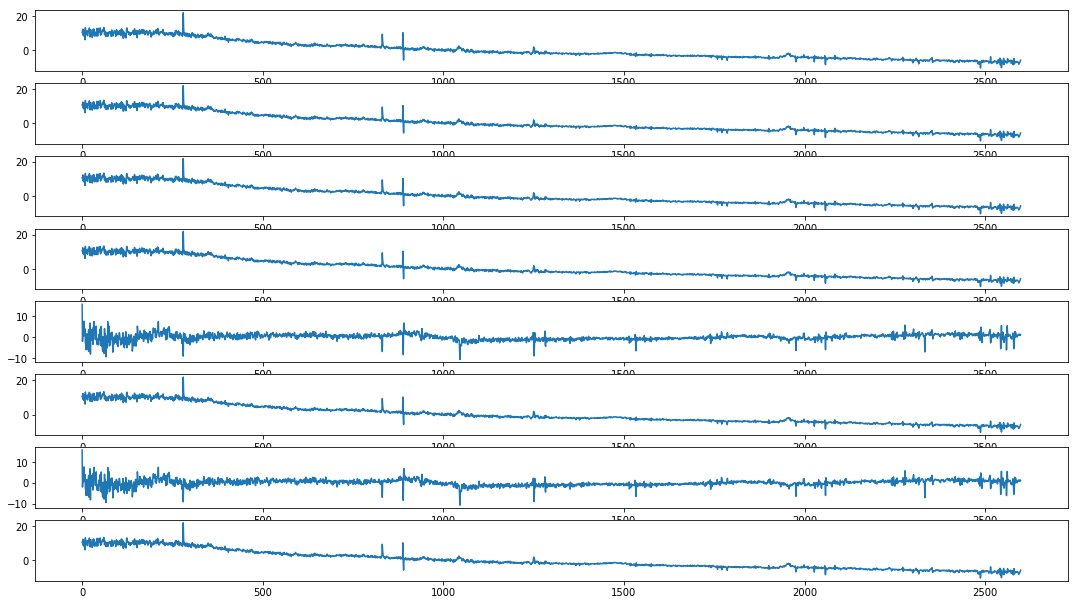

In [23]:
plotSpec(pcaTrans(qso))

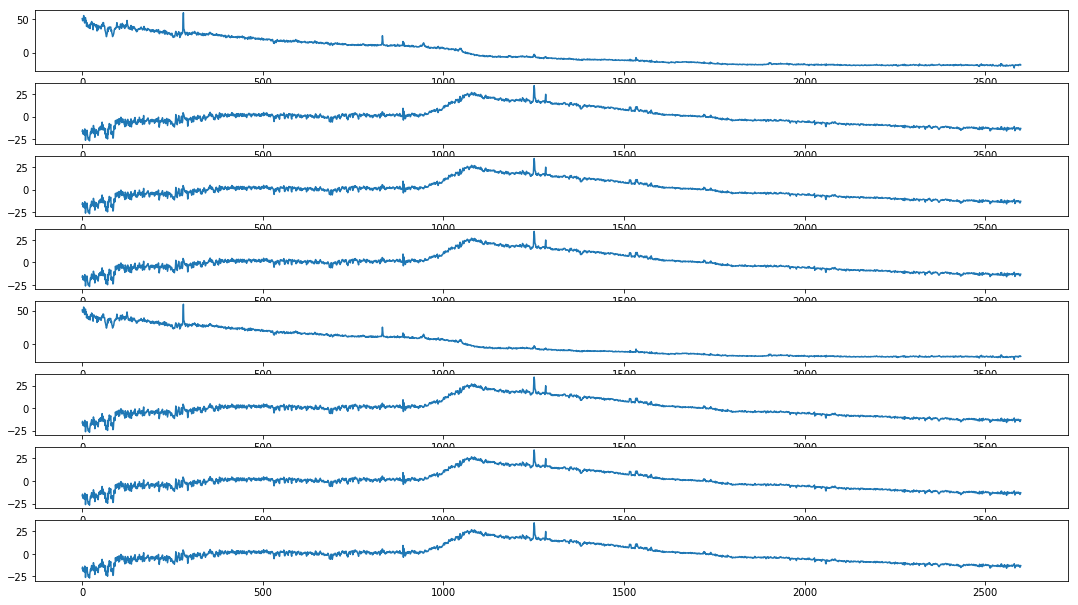

In [25]:
plotSpec(pcaTrans(unknown))

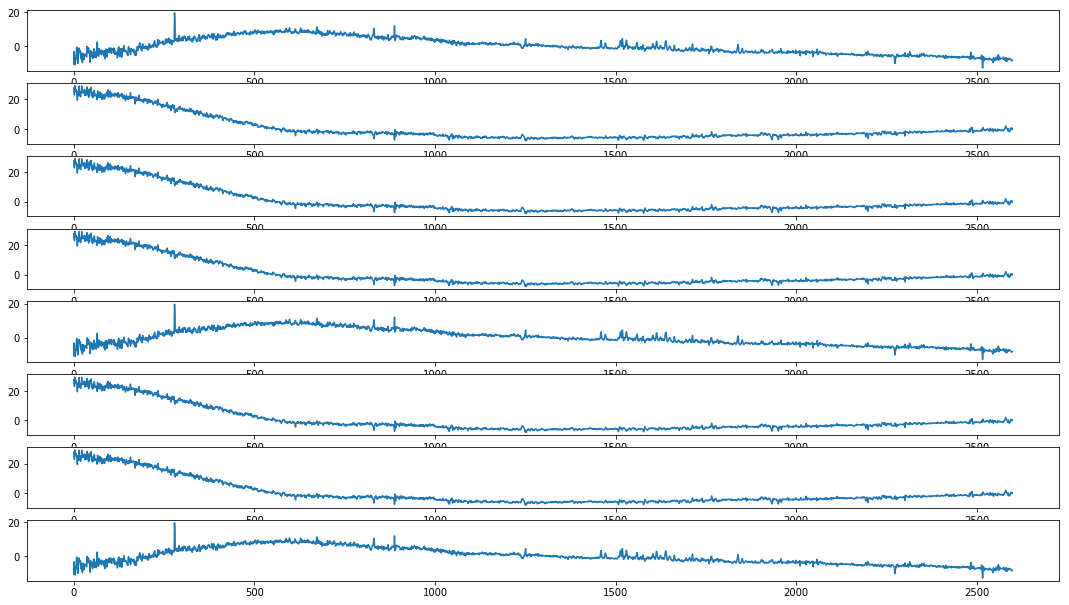

In [26]:
plotSpec(pcaTrans(galaxy))

In [10]:
star.head()

,1,2,3,4,5,6,7,8,9,10,...,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600
0,103.641601,220.972556,345.201439,474.027257,615.001427,649.457591,667.700976,677.602336,684.829992,684.151044,...,229.997133,232.054802,235.320388,238.736069,237.158699,231.987050,225.279224,218.474494,215.023819,217.466604
1,44.186891,106.801495,183.799035,255.156090,332.530898,350.204512,344.187568,305.060164,265.179958,235.221109,...,388.118771,390.743744,394.525406,396.445486,395.624105,391.452810,384.993594,380.445446,378.150392,377.369956
2,35.807626,83.780298,141.292142,197.468507,246.885102,264.089511,272.672241,255.883452,231.061014,212.780171,...,183.779316,183.167764,183.980490,184.733462,184.377508,183.236621,182.286800,181.722545,182.610237,184.364948
3,-1.078086,16.492885,25.635779,39.736068,65.312675,53.926993,65.164851,58.324746,74.183923,59.647540,...,67.414479,67.336124,67.898754,66.342462,65.609885,64.485061,63.274312,63.602719,64.371458,64.091758
5,130.776081,311.976726,429.448637,584.141822,637.139601,691.507620,698.727942,711.607160,790.434915,932.710585,...,727.137310,731.570406,737.482252,734.278213,731.937406,725.381831,718.709962,708.662597,698.072724,699.409833


In [26]:
st = specSet[specSet.label=='star'].iloc[:,1:-1]
print(st.iloc[:,885:900].std(axis=1).head(),st.iloc[:,885:900].std(axis=1).std())
st = specSet[specSet.label=='qso'].iloc[:,1:-1]
print(st.iloc[:,885:900].std(axis=1).head(),st.iloc[:,885:900].std(axis=1).std())
st = specSet[specSet.label=='unknown'].iloc[:,1:-1]
print(st.iloc[:,885:900].std(axis=1).head(),st.iloc[:,885:900].std(axis=1).std())
st = specSet[specSet.label=='galaxy'].iloc[:,1:-1]
print(st.iloc[:,885:900].std(axis=1).head(),st.iloc[:,885:900].std(axis=1).std())

(0     4.499929
1    16.902008
2     9.278574
3     4.042663
5    35.204381
dtype: float64, 230.13937846368574)
(467     3.767574
887     3.101035
3697    3.767372
3823    7.344846
3830    1.355546
dtype: float64, 2.317156604462613)
(4     113.920236
21      6.901667
22     18.588620
31      1.699540
54      0.000000
dtype: float64, 116.05460980161197)
(262    2.639576
397    9.476327
405    2.410584
509    2.135269
525    3.373328
dtype: float64, 14.849251546306252)


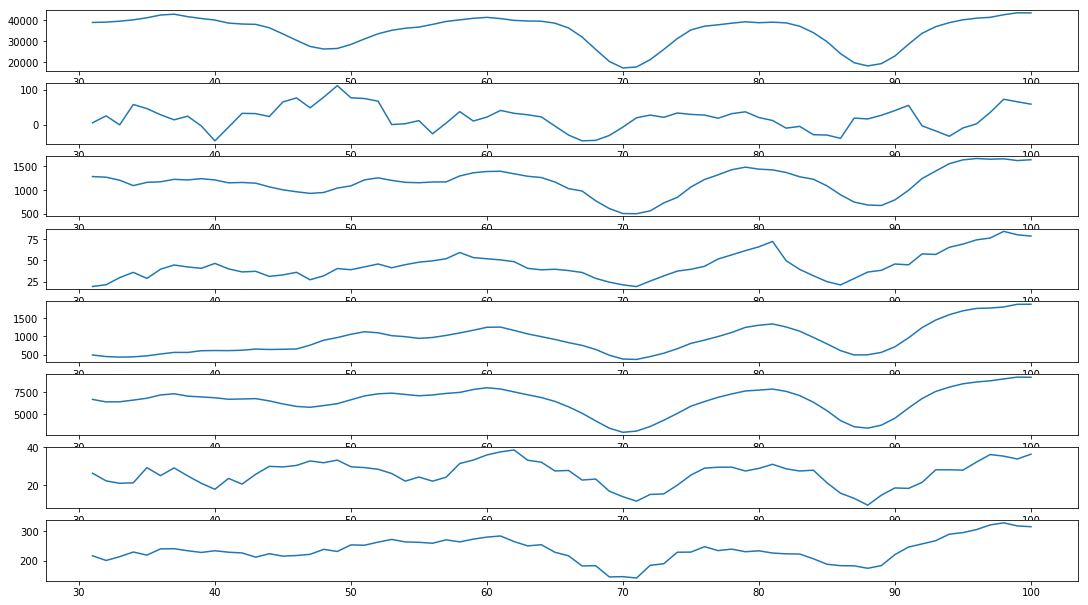

In [56]:
plotSpec(star,start=30,end=100,  filterLow=False, showEW=False, threhold=0.5)

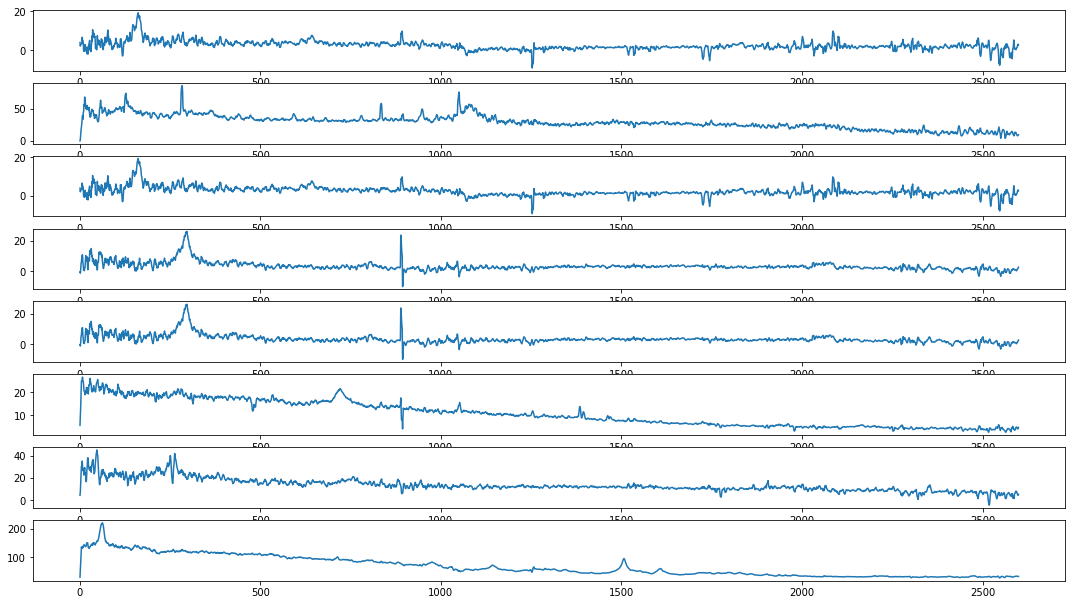

In [55]:
plotSpec(qso,  filterLow=False, showEW=False, threhold=0.5)

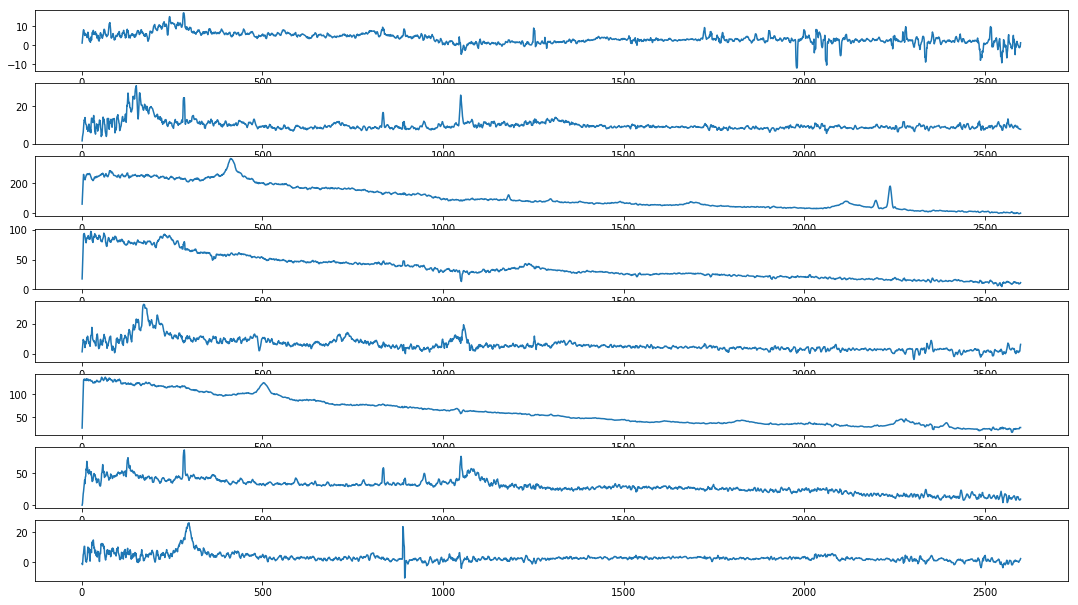

In [17]:
plotSpec(qso,  filterLow=False, showEW=False, threhold=0.5)

In [27]:
r = pd.DataFrame({'k':[1],'b':[2]})

r.columns = ([str(i)+str(1) for i in r.columns.values])
r

,b1,k1
0,2,1


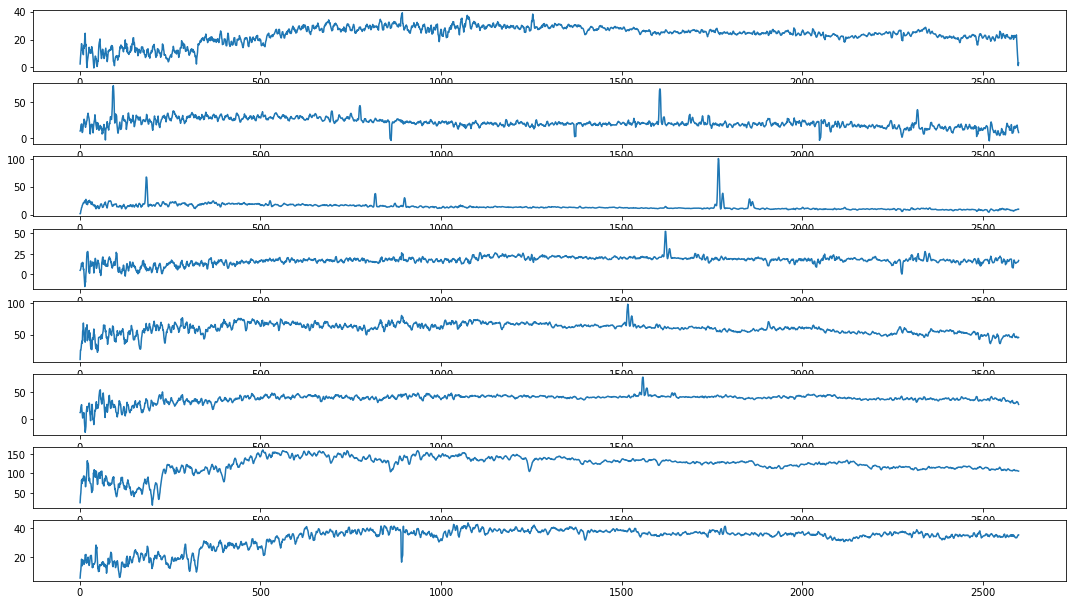

In [28]:
plotSpec(galaxy,  filterLow=False, showEW=False, threhold=0.5)

0     0.030578
1     0.091962
2     0.065827
3     0.105639
5     0.139708
6     0.113085
7     0.175998
8     0.109785
9     0.102043
10    0.040432
11    0.032133
12    0.165073
13    0.027405
14    0.175168
15    0.219857
16    0.129424
17    0.110329
18    0.113172
19    0.105818
20    0.143824
dtype: float64

0     0.030901
1     0.131408
2     0.090371
3     0.250629
5     0.116361
6     0.146914
7     0.479536
8     0.181892
9     0.109524
10    0.064129
11    0.041504
12    0.129665
13    0.029473
14    0.214085
15    0.214956
16    0.140567
17    0.085340
18    0.160995
19    0.198405
20    0.148765
dtype: float64

0     0.017877
1     0.123899
2     0.114792
3     0.091049
5     0.168261
6     0.150785
7     0.129726
8     0.061485
9     0.168355
10    0.084860
11    0.037425
12    0.169532
13    0.039617
14    0.168181
15    0.260440
16    0.181739
17    0.086246
18    0.067702
19    0.102624
20    0.112323
dtype: float64

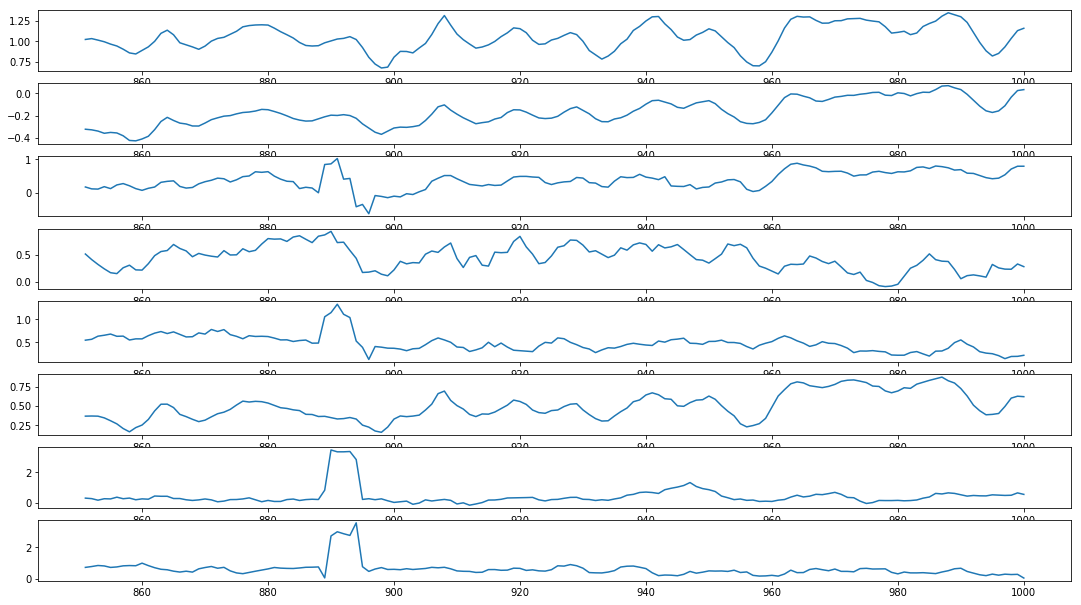

In [13]:
plotSpec(star,start=850,end=1000,  filterLow=False, showEW=False, threhold=0.5)
display(star.iloc[:,850:880].std(axis=1).head(20))
display(star.iloc[:,885:898].std(axis=1).head(20))
display(star.iloc[:,900:920].std(axis=1).head(20))

In [ ]:
plotSpec(qso, start=850,end=1000,  filterLow=False, showEW=False, threhold=0.5)
display(qso.iloc[:,850:880].std(axis=1).head(20))
display(qso.iloc[:,885:898].std(axis=1).head(20))
display(qso.iloc[:,900:940].std(axis=1).head(20))


In [ ]:
display(qso.iloc[:,0:500].mean(axis=1).head(20))
display(qso.iloc[:,0:500].max(axis=1).head(20))
display(qso.iloc[:,0:500].min(axis=1).head(20))
display(qso.iloc[:,0:500].std(axis=1).head(20))
display(qso.iloc[:,0:500].max(axis=1).divide(qso.iloc[:,0:500].mean(axis=1)).head(20))


In [ ]:
plotSpec(qso.diff(axis=1, periods=3), start=100, end=500,  filterLow=False, showEW=False, threhold=0.5)

In [ ]:
plotSpec(unknown.diff(axis=1, periods=3), start=100, end=500,  filterLow=False, showEW=False, threhold=0.5)

In [ ]:
k = qso
std = k.iloc[:,0:500].std(axis=1)
k.iloc[:,0:]

In [ ]:

t1 = qso.iloc[:,100:500].max(axis=1)-(qso.iloc[:,100:500].mean(axis=1))
display(t1.head(100))

In [ ]:
# display(unknown.iloc[:,0:500].mean(axis=1).head(20))
# display(unknown.iloc[:,0:500].max(axis=1).head(20))
# display(unknown.iloc[:,0:500].min(axis=1).head(20))
# display(unknown.iloc[:,0:500].std(axis=1).head(20))

t1 = unknown.iloc[:,100:500].max(axis=1)-(unknown.iloc[:,100:500].mean(axis=1))
# display(t1.head(100))

intervalEWFeature(unknown, start=100, end=500)

In [ ]:
intervalEWFeature(qso, start=100, end=500)

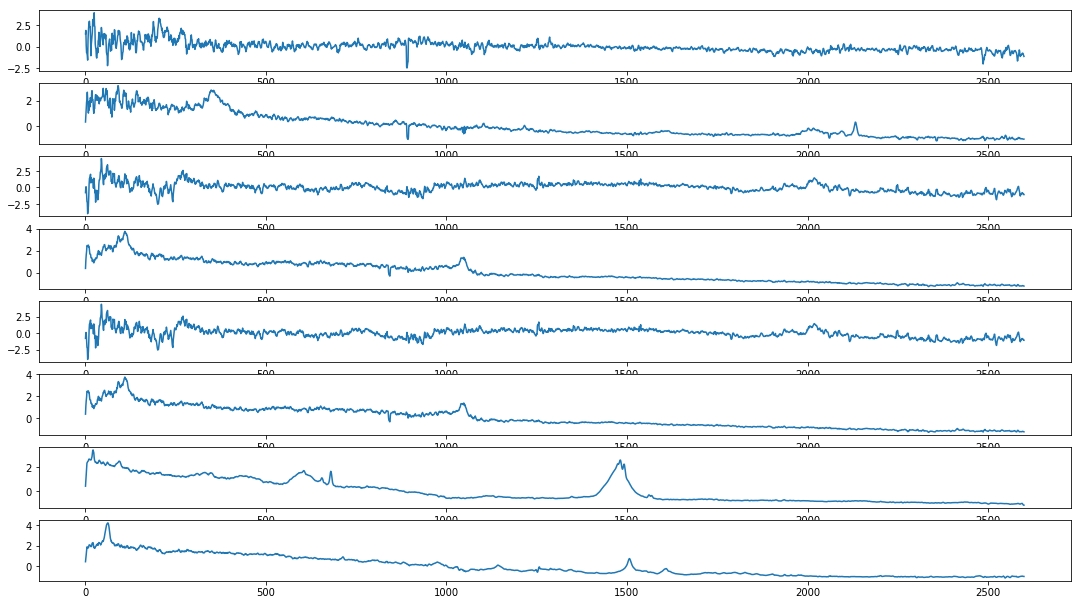

In [15]:
plotSpec(qso,  filterLow=False, showEW=False, threhold=0.5)

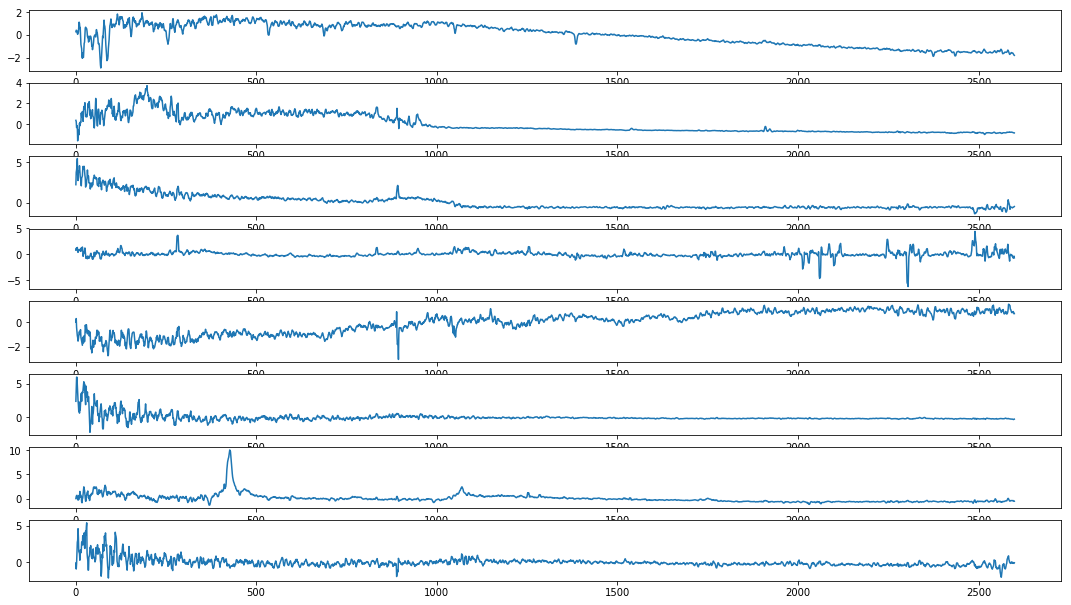

In [16]:
plotSpec(unknown,  filterLow=False, showEW=False, threhold=0.5)

In [220]:
def qsoFeature(data):
    std1 = data.iloc[:,850:880].std(axis=1)
    std2 = data.iloc[:,885:898].std(axis=1)
    std3 = data.iloc[:,900:1000].std(axis=1)
    f1 = (std1<0.3) & (std2>0.35) & (std3<0.35)
    f3 = (std2*std2)/(std1*std3+0.1)
    d1 = std1+0.2
    f2 = (std2>d1)
    qsof = pd.concat([f1, f2, f3], axis=1)
    qsof.columns = ['qso_f1','qso_f2','qso_f3']
    return (qsof)

In [221]:
star.columns

Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
       2591, 2592, 2593, 2594, 2595, 2596, 2597, 2598, 2599, 2600],
      dtype='object', length=2600)

In [222]:
qsoFeature(star).sample(20,replace=False)

,qso_f1,qso_f2,qso_f3
4149,False,False,0.121252
9552,False,True,0.825750
787,False,False,0.392058
7766,False,False,0.567799
4893,True,True,2.237144
181,False,False,0.138938
682,False,False,0.165170
8556,False,False,0.521646
3965,False,False,0.054609
1001,False,False,0.130787


In [226]:
qsoFeature(qso).sample(20,replace=False)

,qso_f1,qso_f2,qso_f3
3823,False,True,1.864146
6362,True,True,47.192700
9701,True,True,7.401342
8076,True,False,0.882468
5335,False,True,12.660492
7047,True,True,2.508812
4457,True,True,3.929808
5455,False,False,0.008098
9397,False,False,0.136354
8922,False,False,0.026299


In [224]:
qsoFeature(unknown).sample(20,replace=False)

,qso_f1,qso_f2,qso_f3
2170,False,True,3.558100
1598,False,False,0.508523
5354,False,True,7.212758
667,True,True,40.389130
5780,True,True,48.398161
5703,True,True,20.748807
881,False,False,0.421026
594,True,True,2.101037
3145,True,True,3.639616
9673,True,True,13.152896


In [225]:
display(unknown.iloc[:,850:880].std(axis=1).head(20))
display(unknown.iloc[:,885:898].std(axis=1).head(20))
display(unknown.iloc[:,900:940].std(axis=1).head(20))

4      0.067175
21     0.386034
22     0.109102
31     0.164688
54     0.000000
62     0.093035
69     0.277912
74     0.202561
80     0.179223
95     0.148371
106    0.207324
109    0.174034
113    0.140538
129    0.155838
143    0.280136
153    0.294950
182    0.137806
200    0.128552
206    0.202112
217    0.458377
dtype: float64

4      0.150276
21     0.549917
22     0.168605
31     0.366745
54     0.000000
62     0.140795
69     0.769606
74     0.794489
80     1.424453
95     0.203174
106    0.368806
109    0.364315
113    0.302697
129    0.421669
143    0.295830
153    0.479875
182    0.695848
200    0.457463
206    0.145238
217    0.232991
dtype: float64

4      0.063038
21     0.398502
22     0.094649
31     0.278748
54     1.044435
62     0.108678
69     0.328430
74     0.143843
80     0.120606
95     0.185974
106    0.266802
109    0.129212
113    0.331416
129    0.224385
143    0.430860
153    0.284253
182    0.119575
200    0.263260
206    0.138789
217    0.252162
dtype: float64

In [ ]:
plotSpec(star, start=250, end=500, filterLow=False)

In [ ]:
plotSpec(galaxy)

In [ ]:
plotSpec(galaxy, start=250, end=500, filterLow=False)

In [ ]:
plotSpec(unknown)

In [ ]:
plotSpec(unknown, start=0, end=500, filterLow=False)

In [ ]:
plotSpec(qso)

In [ ]:
plotSpec(qso, start=250, end=500, filterLow=False)

In [ ]:
plotSpec(qso.iloc[:,0:300])

In [ ]:

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
tp = star
plt.subplot(811)
plt.plot(tp.iloc[random.randint(0,tp.shape[0]),:] )
plt.subplot(812)
plt.plot(tp.iloc[random.randint(0,tp.shape[0]),:] )
plt.subplot(813)
plt.plot(tp.iloc[random.randint(0,tp.shape[0]),:] )
plt.subplot(814)
plt.plot(tp.iloc[random.randint(0,tp.shape[0]),:] )
plt.subplot(815)
plt.plot(tp.iloc[random.randint(0,tp.shape[0]),:] )
plt.subplot(816)
plt.plot(tp.iloc[random.randint(0,tp.shape[0]),:] )
plt.subplot(817)
plt.plot(tp.iloc[random.randint(0,tp.shape[0]),:] )
plt.subplot(818)
plt.plot(tp.iloc[random.randint(0,tp.shape[0]),:] )
# plt.plot(star.iloc[random.randint(0,star.shape[0]),:] )
# plt.plot(star.iloc[random.randint(0,star.shape[0]),:] )

In [ ]:
k = star.iloc[0,:].values
print(k)
np.std(k)

In [ ]:
f = np.fft.fft(star.iloc[0,:].values)
k = 500
f[2:k] = 0
f[-k:-2] = 0
ff = np.fft.ifft(f)
# plt.plot([abs(k) for k in f])
plt.plot(ff)
# plt.plot(star.iloc[0,:])

In [ ]:
f[-2:]

In [ ]:
k = np.fft.fft(star.iloc[0,:].values)
k[100:101]


In [ ]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
k_star = star
k_star[abs(k_star)<0.5] = 0
k_qso = qso
k_qso[abs(k_qso)<0.5] = 0
# plt.plot(k_star.iloc[random.randint(0,k_star.shape[0]-1),:] )
plt.plot(k_qso.iloc[random.randint(0,k_qso.shape[0]-1),:] )
plt.plot(k_qso.iloc[random.randint(0,k_qso.shape[0]-1),:] )
plt.plot(k_qso.iloc[random.randint(0,k_qso.shape[0]-1),:] )
# plt.plot(unknown.iloc[random.randint(0,unknown.shape[0]-1),:] )
# plt.plot(galaxy.iloc[random.randint(0,galaxy.shape[0]-1),:] )



In [ ]:
k_star = star
k_star[abs(k_star)<2] = 0
k_star

In [ ]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(qso.iloc[random.randint(0,qso.shape[0]),:] )
plt.plot(qso.iloc[random.randint(0,qso.shape[0]),:] )
plt.plot(qso.iloc[random.randint(0,qso.shape[0]),:] )
plt.plot(qso.iloc[random.randint(0,qso.shape[0]),:] )

In [ ]:
star.iloc[2,300:38] 

In [ ]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(qso.iloc[1,:] )
plt.plot(qso.iloc[2,:] )
plt.plot(qso.iloc[3,:] )
plt.plot(qso.iloc[4,:] )


In [ ]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(galaxy.iloc[1,:] )
plt.plot(galaxy.iloc[2,:] )
plt.plot(galaxy.iloc[3,:] )
plt.plot(galaxy.iloc[4,:] )


In [ ]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(unknown.iloc[1,:] )
plt.plot(unknown.iloc[2,:] )
plt.plot(unknown.iloc[3,:] )
plt.plot(unknown.iloc[4,:] )


In [ ]:
def submit(fileName, testTotal, preds):
    submission = testTotal[['id']]
    submission['pred'] = preds
    submission.to_csv('./predicts/'+fileName, header=False, index=False)
    return submission
    

In [ ]:
def extractFeature(train_feature, partition=2, randomPartion=False, prefix="p", onlyAvg=False, levelFeature=False, smooth=False):
    if smooth:
        train_feature = train_feature.rolling(100, axis=1).mean()
    plen = train_feature.shape[1]/partition
    features = pd.DataFrame()
    avgs = pd.DataFrame()
    for i in range(0, partition):
        pstart = random.randint(0, train_feature.shape[1]-plen-1)
        pendExclue = pstart + plen + 1
        avgC = train_feature.iloc[:, pstart:pendExclue].mean(axis=1)
        stdC = train_feature.iloc[:, pstart:pendExclue].std(axis=1)
        maxC = train_feature.iloc[:, pstart:pendExclue].max(axis=1)
        minC = train_feature.iloc[:, pstart:pendExclue].min(axis=1)
        medianC = train_feature.iloc[:, pstart:pendExclue].median(axis=1)
        diffC = train_feature.iloc[:, pstart:pendExclue].diff(axis=1).iloc[:,1:]
        features[prefix+'_avg'+str(i)] = avgC
        avgs[prefix+'_avg'+str(i)] = avgC
        if onlyAvg==False:
            features[prefix+'_std'+str(i)] = stdC
            features[prefix+'_median'+str(i)] = medianC
            features[prefix+'_max'+str(i)] = maxC
            features[prefix+'_min'+str(i)] = minC
            features[prefix+'_avg_m_std'+str(i)] = stdC/avgC
            features[prefix+'_max_m_avg'+str(i)] = maxC/avgC
            features[prefix+'_min_m_avg'+str(i)] = minC/avgC
#             features[prefix+'_media_m_avg'+str(i)] = medianC/avgC
    if levelFeature:
        level_feature = extractFeature(avgs, prefix="l", partition = 4)
        features = pd.concat([features, level_feature], axis = 1)
    return features.fillna(0)

In [ ]:
def readTotalFeature(fileName, maxFileIndex, hasLabel=True, partition = 20):
    total_train_feature = pd.DataFrame()
    for i in range(0, maxFileIndex+1):
        print('processing:' + str(i))
        train_set = pd.read_csv(fileName + str(i) +'.csv', header=None)
        renameCol = {0:'id'}
        if hasLabel:
            renameCol[train_set.shape[1]-1] = 'label'
        train_set.rename(columns=renameCol, inplace=True)
        if hasLabel:
            processed_train = extractFeature(train_set.iloc[:,1:-1],partition, levelFeature=False, smooth=False)
            processed_train['label'] = train_set.label
        else:
            processed_train = extractFeature(train_set.iloc[:,1:],partition, levelFeature=False, smooth=False)
            processed_train['id'] = train_set.id
        total_train_feature = total_train_feature.append(processed_train, ignore_index=True)
    return total_train_feature.sample(total_train_feature.shape[0], replace=False)

In [ ]:
validMode = True
reFeature = False
rng = np.random.RandomState(42)

In [ ]:
if reFeature:
    total_train_feature = readTotalFeature('./train_feature_all_', 48, partition=40)
    total_train_feature.to_csv('./train_feature_check_point.csv', index=False)
else :
    total_train_feature = pd.read_csv('./train_feature_check_point.csv')

In [ ]:
display(total_train_feature.head())
total_train_feature.shape

In [ ]:
X = total_train_feature.iloc[:,:-1]
Y = total_train_feature.iloc[:,-1]

# Split the dataset in two equal parts
x, t_x, y, t_y = train_test_split(
    X, Y, test_size=0.3, random_state=0)
x.shape


In [ ]:
def outlier_rejection(X, y):
    model = IsolationForest(n_jobs=-1, random_state=rng)
    model.fit(X)
    y_pred = model.predict(X)
    return X[y_pred == 1], y[y_pred == 1]

In [ ]:
smote = SMOTE()
anova_filter = SelectKBest(f_classif, k=(int)(x.shape[1]*0.3))
model = RandomForestClassifier(n_jobs=4, max_depth=70,  verbose=1,random_state=rng)
# model = AdaBoostClassifier(random_state=rng)
# model = GradientBoostingClassifier(random_state=rng,verbose=1)
# model = XGBClassifier()
# model = KNeighborsClassifier(n_neighbors = 3, n_jobs=-1)
scaler = StandardScaler()
clf = ImPineline([
#     ('anova', anova_filter),
    ('scaler',scaler),
    ('smote',smote),
    ('model', model)
])


In [ ]:
if validMode:
    rs = clf.fit(x, y)
    scores = cross_val_score(clf, x, y, cv=3, n_jobs=-1, verbose=1, scoring='f1_macro')
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
#     preds_test = clf.predict(t_x)
    # clf.score(t_x, t_y)
#     print("%0.3f" % f1_score(t_y, preds_test, average='macro'))  

In [ ]:
if validMode:
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()


In [ ]:
if validMode:
    smote = SMOTE()
    parameters = {
        'max_depth':[60, 70, 80],  #70
        'max_features':[0.5,0.6,0.7], #0.6
    #     'min_samples_split':[2, 4, 8, 20], #2
    #     'min_samples_leaf':[1,4,8,20], #1
    #     'min_weight_fraction_leaf':[0,0.05,0.1,0.2], #0
        'max_leaf_nodes':[800, 1000, 1200], #1000
    #      'bootstrap':[True, False], #False
    #     'oob_score':[True, False], #False
    #     'class_weight':[None,'balanced'], #balanced
        'n_estimators':[10, 20], #10
    #     'criterion':['gini','entropy']
    }
    clf = GridSearchCV(RandomForestClassifier(n_jobs=4, max_depth=20), parameters, cv=5,
                           scoring='f1_macro', n_jobs=8, verbose=2)
    clf.fit(x, y)
    print(clf.best_params_)
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [ ]:
if validMode:
    clf = RandomForestClassifier(n_jobs=-1, max_depth=50, max_features=0.6, max_leaf_nodes=1000, bootstrap= False, verbose=1 )
    rs = clf.fit(x, y)
    preds_test = clf.predict(t_x)
    # clf.score(t_x, t_y)
    f1_score(t_y, preds_test, average='macro')  

In [ ]:
if validMode:
    rs = clf.fit(x, y)
    preds_test = clf.predict(t_x)
    clf.score(t_x, t_y)
    print("%0.3f" % f1_score(t_y, preds_test, average='macro'))  

In [ ]:
if reFeature:
    testTotal = readTotalFeature('./test_feature_all_', 9, False, partition=40)
    testTotal.to_csv('./test_feature_checkpoint.csv', index=False)
    testTotal.head()
else :
    testTotal = pd.read_csv('./test_feature_checkpoint.csv')

In [ ]:
testTotal.head()
total_train_feature.shape

In [ ]:
clf.fit(total_train_feature.iloc[:,:-1], total_train_feature.iloc[:,-1])



In [ ]:
test_x = testTotal.iloc[:,:-1]
pred = clf.predict(test_x)
timestr = time.strftime("%m%d_%H%M")
submit(timestr+'_rf_40.csv',testTotal, pred)


In [ ]:
total_train_feature.head()

In [ ]:
total_train_feature[:,:-1]